#Introduction 😃😃😃😃
Wine Quality DataSet
This datasets is related to red variants of the Portuguese "Vinho Verde" wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality. - The datasets can be viewed as classification or regression tasks.

**This data frame contains the following columns:**
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10- sulphates
- 11 - alcohol
- 12 - quality
#Work plan 😃😃😃
- Analyze and explore data
- Building a Machine Learning Model

In [ ]:
!pip install scikit-learn==1.8.0

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [ ]:
df = pd.read_csv("/content/WineQT.csv")

In [ ]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [ ]:
df["density"].max()

1.00369

In [ ]:
# The Id column is not useful so we drop it
df.drop("Id", axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
ave_qu = df.groupby("quality").mean()
ave_qu

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.450000,0.897500,0.211667,2.666667,0.105333,8.166667,24.500000,0.997682,3.361667,0.550000,9.691667
4,7.809091,0.700000,0.165758,2.566667,0.094788,14.848485,40.606061,0.996669,3.391212,0.637879,10.260606
5,8.161077,0.585280,0.240124,2.540476,0.091770,16.612836,55.299172,0.997073,3.302091,0.613375,9.902277
6,8.317749,0.504957,0.263680,2.444805,0.085281,15.215368,39.941558,0.996610,3.323788,0.676537,10.655339
7,8.851049,0.393671,0.386573,2.760140,0.075217,14.538462,37.489510,0.996071,3.287133,0.743566,11.482634
8,8.806250,0.410000,0.432500,2.643750,0.070187,11.062500,29.375000,0.995553,3.240625,0.766250,11.937500


<Axes: xlabel='quality'>

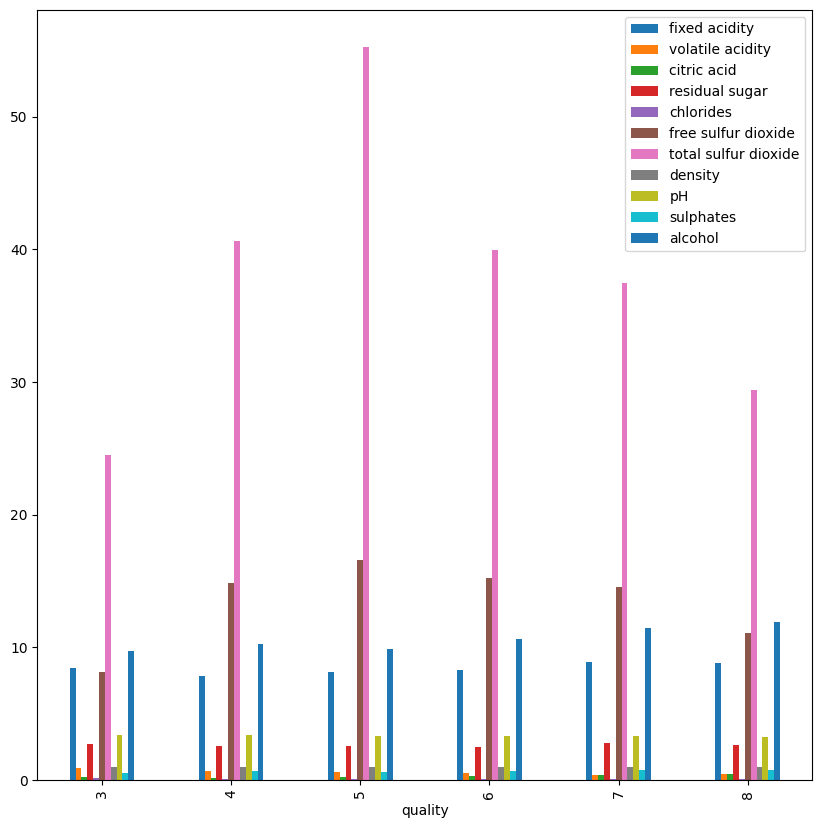

In [ ]:
ave_qu.plot(kind="bar",figsize = (10,10))

**We see the effect of features on the quality of wine**

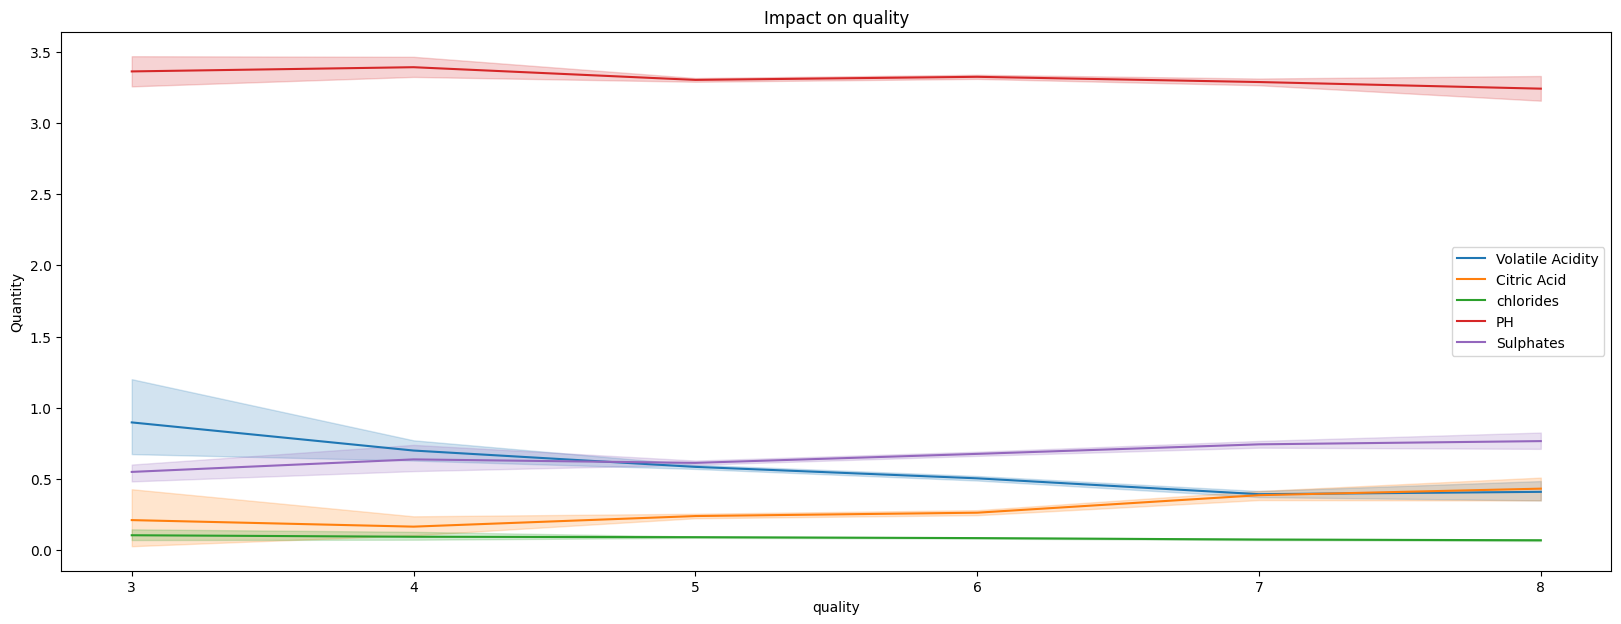

In [ ]:
# let see effect some of elements on the quality - details
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x="quality",y="volatile acidity",label="Volatile Acidity")
sns.lineplot(data=df, x="quality",y="citric acid",label="Citric Acid")
sns.lineplot(data=df, x="quality",y="chlorides",label="chlorides")
sns.lineplot(data=df, x="quality",y="pH",label="PH")
sns.lineplot(data=df, x="quality",y="sulphates",label="Sulphates")
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()
plt.show()

**We see this features does not have high effect on wine quality**

#Analysis Results 🙈🙉🙊
We have 5 types of quality in DataSet - 3 to 8

The Best quality 8
The less quality 3
#The elements highest effect on the quality of wine:
- 1 - Alcohol
- 2 - Free sulfur dioxide
- 3 - Total sulfur dioxide
#The elements lessest or a simple effect on the quality of wine:
- 1 - Fixed acidity
- 2 - Volatile acidity
- 3 - Citric acid
- 4 - Residual sugar
- 5 - Chlorides
- 6 - Density
- 7 - PH
- 8 - Sulphates

In [ ]:
X = df.iloc[:,0:-1] # all features except quality
y = df.iloc[:,-1] # output (quality)

In [ ]:
# Splitting the data in both training in testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
# Adding pipeline so first the input will be standard scalrized then give to the model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(
      random_state = 42,
      bootstrap = True,
      oob_score = True
    ))])

In [ ]:
params_grid = {
    'model__n_estimators': [100,200,250],
    'model__max_depth': [2,4,6,7],
    'model__criterion' : ['gini','entropy'],
    'model__max_samples' : [0.5,0.75],
    'model__max_features' : ['sqrt','log2'],
    'model__min_samples_split' : [2,4,6,8]
}

In [ ]:
# Applying GridSearchCV for best model with best parameter
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipeline,params_grid,cv=5,verbose = 2,n_jobs = -1,scoring = 'accuracy')
grid.fit(X_train,y_train)
print("Best Parameter:",grid.best_params_)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best Parameter: {'model__criterion': 'entropy', 'model__max_depth': 7, 'model__max_features': 'sqrt', 'model__max_samples': 0.75, 'model__min_samples_split': 4, 'model__n_estimators': 250}


In [ ]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.6768558951965066


In [ ]:
import joblib
joblib.dump(best_model,'Wine_quality.pkl')


['Wine_quality.pkl']